#### This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

\begin{equation*}
\newcommand{\pc}{\underline p}
\newcommand{\vc}{\underline v}
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
%matplotlib inline

# Finite differences as an example for numerical acoustic problem solving
## Approximation of derivatives using finite differences
The finite differences method aims to find the solution not in the whole domain, but to approximate it only at some points in the domain. The basic idea is to replace all derivatives in the governing DE, in our case in the wave equation, by using finite differences. The starting point is the definition of the derivative:

\begin{equation}
\frac{\partial p(x_i)}{\partial x} = \lim_{h \rightarrow 0} \frac{p(x_i+h) - p(x_i)}{h}.
\end{equation}

Here, $h$ can be though of a very small difference between to arguments to the function that is required to vanish. If we assume that it does not vanish, but is very small, we can hope to get an approxiation for the derivative just from the quotient of differences:

\begin{equation}
\frac{\partial p(x_i)}{\partial x} \approx \frac{p(x_i+h) - p(x_i)}{h} = \frac{p_{i+1} - p_i}{h}.
\end{equation}

In the last part of this equation, $p_i$ and $p_{i+1}$ are just abbreviations for $p(x_i)$ and $p(x_i+h)$, respectively. This type of approximation is called a "forward" finite difference, because it uses the value $p_{i+1}$. It can be shown that the approximation error in this case is proportional to $h$. Therefore it decreases linearly if $h$ becomes smaller. This holds also for the backward finite difference approximation

\begin{equation}
\frac{\partial p(x_i)}{\partial x} \approx \frac{p_{i} - p_{i-1}}{h}.
\end{equation}

Another possiblity is the central finite difference

\begin{equation}
\frac{\partial p(x_i)}{\partial x} \approx \frac{p_{i+1} - p_{i-1}}{2h},
\end{equation}

in which case the approximation error is proportional to $h^2$ and consequently decreases faster with smaller $h$ than for the forward and backward differences. There are many more finite difference schemes, but these will need more than two function values to be computed.

Higher order derivatives can also be approximated by finite differences. One possibility for the second derivative is 

\begin{equation}
\label{eq:fd2}
\frac{\partial^2 p(x_i)}{\partial x^2} \approx \frac{p_{i+1} - 2 p_i + p_{i-1}}{h^2},
\end{equation}

where the error is again proportional to $h^2$.

## Wave equation using finite differences
For the sake of brevity we shall consider only the one-dimensional wave equation

\begin{equation}
\label{eq:wave_eq}
\frac{\partial^2 \pc}{\partial x^2} + k^2 \pc = 0.
\end{equation}

Using the finite difference from Eq. ($\ref{eq:fd2}$) we get the following approximation:

\begin{equation}
\frac{\pc_{i+1} - 2 \pc_i + \pc_{i-1}}{h^2} +k^2 \pc_i = 0.
\end{equation}

Likewise, it is possible to approximate the equation of motion using centraĺ finite differences, so the sound velocity gets

\begin{equation}
\vc = - \frac{1}{j\omega\rho}\frac{\pc_{i+1} - \pc_{i-1}}{2h}.
\end{equation}


## Example problem: bi-terminated pipe
As an example problem to solve we consider now a pipe of length $L$ that has hard terminations (is closed) at both ends. We are interested in the resonant frequency, or eigenfrequency of the pipe. First, we have a look at the reference solution.

A classical way to compute the solution analytically is to solve the one-dimensional wave equation (\ref{eq:wave_eq}) with appropriate boundary conditions. The boundary condition for the hard termination is

\begin{equation}
\vc(0)= 0,  \qquad \vc(L)= 0. 
\end{equation}

Consequently, also $\frac{\partial \pc}{\partial x} = 0$ for both $x=0$ and $x=L$.

If we use plane waves

\begin{equation}
\pc(x) = \pc_+ e^{-jkx}+\pc_- e^{+jkx}
\end{equation}

as solutions of the wave equation, from the boundary conditions we get 

\begin{equation}
\pc(x) = \pc_0 \cos\left(n\pi\frac{x}{L}\right)\qquad n=0,1,2,...
\end{equation}

as the sound field (or mode shape) and $k = \frac{\omega}{c}= \frac{n\pi}{L}$ for the wave number. This leads to  eigenfrequencies of 

\begin{equation}
f_n = \frac{nc}{2L}.
\end{equation}

Lets now plot the sound field and list the eigenfrequency for several mode numbers $n$. 

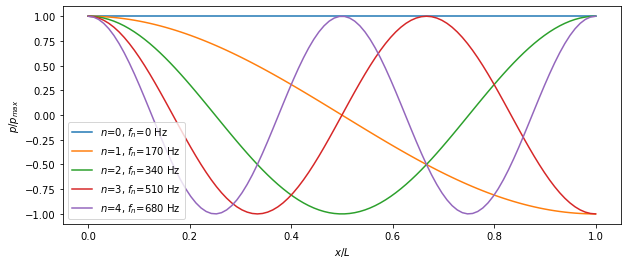

In [2]:
plt.figure(figsize=(10,4))
L = 1 # pipe length
c = 340 # speed of sound
xL = np.linspace(0,1,100) # we plot from x/L = 0 to 1 and use 100 steps
for n in np.arange(5):
    plt.plot(xL,np.cos(n*np.pi*xL),label="$n$=%i, $f_n$=%.0f Hz"%(n,n*c/2))
plt.legend()
plt.xlabel('$x/L$')
plt.ylabel('$p/p_{max}$');

The analytical solution was only possible because we somehow "guessed" that the type of the result function is complex exponential or trigonometric. In the next step we do not want to guess a thing, we just compute an (approximate) solution!

We start with the domain (the tube in this case) and represent it using $N=3$ points. These can then be used to set up the wave equation in approximated form using finite differences. Because for the second derivative we learned about the central form of finite differences, we will need also two extra points outside the pipe: one outside each of both ends. Although we are not interested in the sound field there, these points are used to set up the computational problem. However, as we will see later on, there is no need to actually compute the sound pressure at these points. We could even avoid to use them altogether, but this would require some more sophisticated finite difference approximations.

To summarize, we have the pipe domain and $N+2=5$ points ($i$=0...4) to represent it and its boundaries. The distance  that is used to compute the finite difference is $h=\frac{L}{N-1}$.

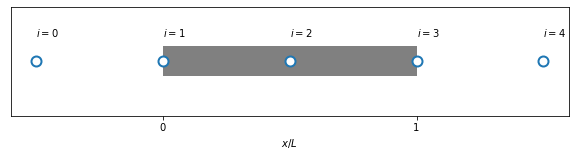

In [3]:
xi = np.linspace(-0.5,1.5,5)
plt.figure(figsize=(10,2))
plt.plot(xi[[1,-2]],(0,0),color='grey',lw=30,solid_capstyle= 'butt')
plt.plot(xi,np.zeros_like(xi),'o',ms=10,markerfacecolor='white',mew=2)
[plt.text(xi[_],0.025,'$i=$%i'%_) for _ in np.arange(5)]
plt.yticks([])
plt.xticks((0,1))
plt.xlabel('$x/L$');

Now, the wave equation can be set up for $i=1,2,3$:

\begin{equation}
\frac{\pc_{i-1}-2\pc_i+\pc_{i+1}}{h^2}+k^2 \pc_i = 0
\end{equation}

where the $\pc_i$ can be complex-valued.

For $i=1,3$ the boundary conditions in finite difference form read:

\begin{equation}
\frac{\pc_{i+1}-\pc_{i-1}}{2h} = 0.
\end{equation}

Together we get 5 linear equations which are reordered here to show the structure of this system equations:

\begin{equation}\label{eq:FDM_Gls}
  \begin{array}{rrrrrr}
    -\frac{1}{2h}\pc_0 & &+\frac{1}{2h}\pc_2 & & &=0\\
    \frac{1}{h^2}\pc_0 &+ (-\frac{2}{h^2}+k^2)\pc_1 &+ \frac{1}{h^2}\pc_2 &  &  &=0\\
    &  \frac{1}{h^2}\pc_1 &+ (-\frac{2}{h^2}+k^2)\pc_2 &+ \frac{1}{h^2}\pc_3 &  &=0\\
    &  &  \frac{1}{h^2}\pc_2 &+ (-\frac{2}{h^2}+k^2)\pc_3 &+ \frac{1}{h^2}\pc_4 &=0\\
    & &-\frac{1}{2h}\pc_2 & &+\frac{1}{2h}\pc_4 &=0\\
  \end{array}
\end{equation}

The first and last equation are the boundary conditions and the remaining represent the wave equation. $\pc_0$ and $\pc_4$ can be eliminated from the first two and the last two equations, respectively. Then we get a system with the remaining unknowns (now in matrix form):

\begin{equation}\label{eq:FDM_Gls1}
  \begin{pmatrix}
   (-\frac{2}{h^2}+k^2) &+ \frac{2}{h^2} & 0\\
    \frac{1}{h^2} & (-\frac{2}{h^2}+k^2) & \frac{1}{h^2}\\
    0& \frac{2}{h^2}& (-\frac{2}{h^2}+k^2) \\
  \end{pmatrix}
  \begin{pmatrix}
    \pc_1\\
    \pc_2\\
    \pc_3\\
  \end{pmatrix}
=
  \begin{pmatrix}
    0\\
    0\\
    0\\
  \end{pmatrix}
\end{equation}.

This can be rewritten into an eigenvalue problem:

\begin{equation}\label{eq:FDM_Gls2}
\frac{1}{h^2}
  \begin{pmatrix}
   -2 & 2 & 0\\
    1 & -2 & 1\\
    0 & 2 & -2\\
  \end{pmatrix}
  \begin{pmatrix}
    \pc_1\\
    \pc_2\\
    \pc_3\\
  \end{pmatrix}
=
-k^2
  \begin{pmatrix}
    \pc_1\\
    \pc_2\\
    \pc_3\\
  \end{pmatrix}
\end{equation}.

We observe that the matrix has all -2 in the main diagonal and all 1 in the next diagonals except for the first and last row, where the entry in the next diagonals is 2.

The eigenvalue problem can easily be solved (we assume $L$ and $c$ as before):

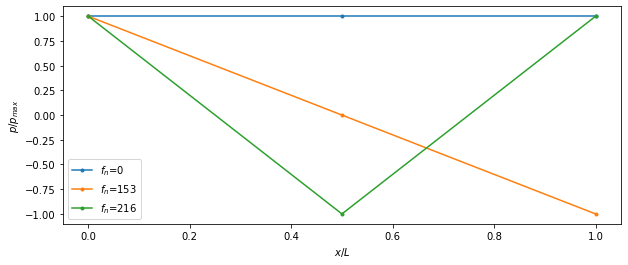

In [4]:
plt.figure(figsize=(10,4))
h = 0.5 # because N=3 and L=1
A = np.array(((-2,2,0),(1,-2,1),(0,2,-2)))
evas,eves = np.linalg.eig(A/h**2)
soid = np.argsort(-evas) # this needs to be sorted 
for eva,eve in zip(evas[soid],eves.T[soid]):
    plt.plot(xi[1:4],eve/eve[0],'.-',label="$f_n$=%0.f"%(c*np.sqrt(-eva)/(2*np.pi)))
plt.legend()
plt.xlabel('$x/L$')
plt.ylabel('$p/p_{max}$');

These results are not exactly the same that we got from the analytical reference above. However, that are also not *that* different. E.g. instead of 170 Hz we get 153 Hz. This is not that bad. The solution for the sound field also resembles the reference solution, if we take into account that it is just represented by three points in the domain.

Keeping this in mind, it is quite simple to improve the accuracy of the results - we just need to use more than three points (we have to change $N$). Then everything in our eigenvalue problem stays essentially the same with the exception of $h$ and the matrix dimension.

Let's see what happens if we do so. This time we set up a quick application, that plots up to the five first solutions depending on the $N$ we choose (a maximum of $N$=100 will probably be enough)

In [5]:
# this function is called to compute and plot for N points in the pipe domain
def plot_pipe(N): 
    plt.figure(figsize=(10,4))
    h = L/(N-1)
    A = -2.0*np.diag(np.ones(N,dtype=float)) # fill main diagonal
    A[np.arange(N-1),np.arange(1,N)] = 1.0 # fill next diagonals
    A[np.arange(1,N),np.arange(N-1)] = 1.0
    A[0,1] = 2.0 # first row
    A[N-1,N-2] = 2.0 # last row
    evas,eves = np.linalg.eig(A/h**2)
    soid = np.argsort(-evas)[:5]
    for eva,eve in zip(evas[soid],eves.T[soid]):
        plt.plot(np.linspace(0,1,N),eve/eve[0],'.-',
                 label="$f_n$=%0.f"%(c*np.sqrt(abs(eva))/(2*np.pi)))
    plt.legend()
    plt.xlabel('$x/L$')
    plt.ylabel('$p/p_{max}$');
    
ipw.interact(plot_pipe,N=ipw.IntSlider(value=3,min=3,max=100,continuous_update=False));    

interactive(children=(IntSlider(value=3, continuous_update=False, description='N', min=3), Output()), _dom_cla…

If we compare the output now to the analytical solution, we see that we are able to get a very good approximation. It is quite remarkable to see cosine-like "functions" although we did *not* guess beforehand that the solution would have this form. Instead, this appears out of purely numerical (algebraic) computation.

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Numerical Acoustics: Finite differences as an example for numerical acoustic problem solving, 2019.